In [1]:
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import math
import os
import sklearn
import soundfile as sf
import tensorflow as tf
import keras

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
sr = 22050

def myFIRFiltResponse(b,title, sr, a=1): 
    
    w, h = scipy.signal.freqz(b,a)
    fig, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.plot((w/math.pi)*sr, np.log10(np.abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Normalized Frequency')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w/math.pi, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')
    plt.show()


def prepare_audio_seq(dry_test, frame):
    audio = dry_test
    counter = 0
    
    audio = np.pad(audio, (frame-1,0))
    audio = audio[0:audio.size-frame+1]
    
    results = np.zeros((audio.size, frame))
    for i in range(0+frame,audio.size-frame-1):
        
            segment = audio[i-frame:i]
            

            results[counter,:] = segment
            counter+= 1
    
    return results



def mySpectrogram(s,sr,title):
    
    D = librosa.stft(s)
    DdB = librosa.amplitude_to_db(abs(D))
    plt.figure(figsize=(10, 4), dpi=120)
    librosa.display.specshow(DdB, sr=sr, x_axis='time', y_axis='linear')
    plt.title(title)
    plt.show()

def myWaveform(s,title):
    plt.figure(figsize=(14, 3))
    plt.plot(s)
    plt.title(title)

    plt.show()

def compare_waveforms(original, predicted, true_output, title, start,stop):
    plt.figure(figsize=(16,6))
    plt.plot(original[start:stop])
    plt.plot(predicted[start:stop])
    plt.plot(true_output[start:stop])
    plt.legend(['original', 'predicted', 'true output'])
    plt.title(title)
    plt.show()

# Load wavfiles for inspection

In [3]:
filenames = os.listdir('./testwavs/')

In [ ]:
# Displaying spectrograms of all the wav files in the testwavs folder
for filename in filenames:
    testwav, dummy = librosa.load('./testwavs/'+filename, sr=sr)
    mySpectrogram(testwav, sr, filename)

In [4]:
# Inspecting individual wav files
testwav, dummy = librosa.load('./testwavs/model_28SD1.wav.wav', sr=sr)
mySpectrogram(testwav, sr, 'model28')
Ipd.Audio(testwav, rate=sr)

/Users/arvidfalch/miniforge3/envs/ml2/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: './testwavs/model_28SD1.wav.wav'

# Load a pre-train model, predict audio and inspect

In [37]:
# Choose a pre-trained model to load
model_name = 'Model_3045'
# Load the model
model = tf.keras.models.load_model('./Models/'+ model_name)
model.summary()

Model: "model_3045"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3045layer (LSTM)      (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Loading the audio, use duration= (duration in seconds) and offset= (offset in seconds) to choose audio from the audio files
dry_audio, dummy = librosa.load('./MLDataset2/Dry.wav', sr=sr, duration=11, offset=109)
# Choose this line for a model trained on the SD1
wet_audio, dummy = librosa.load('./MLDataset2/SD1.wav', sr=sr, duration=11, offset=109)
# Choose this line for a model trained on the B65
wet_audio_2, dummy = librosa.load('./MLDataset2/B65.wav', sr=sr, duration=11, offset=109)
# Choose this line for models trained on the CE5
'''wet_audio, dummy = librosa.load('./MLDataset2/CE5.wav', sr=sr, duration=5, offset=120)'''

frame = 64 # Make sure to look at model summary or csv file to set the frame size expected by the model
to_predict = prepare_audio_seq(dry_audio, frame)
predicted = model.predict(to_predict)
predicted = predicted.flatten()



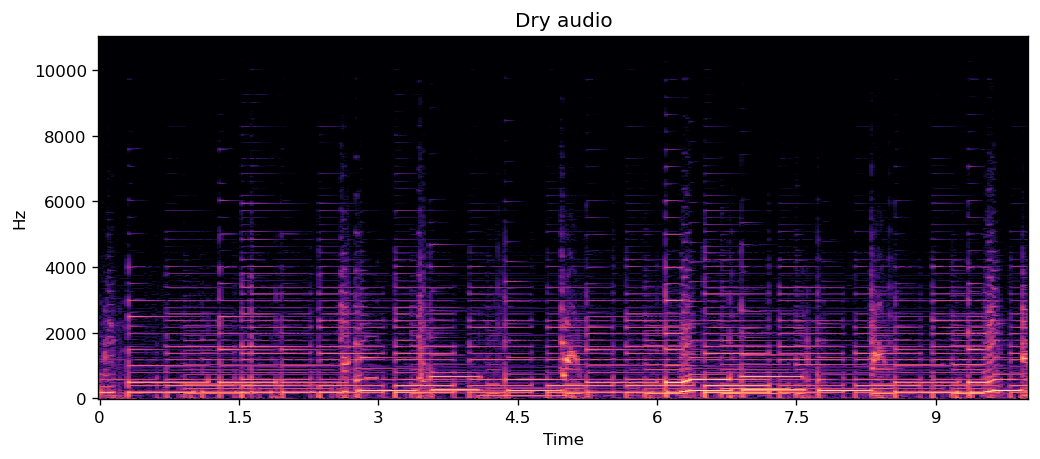

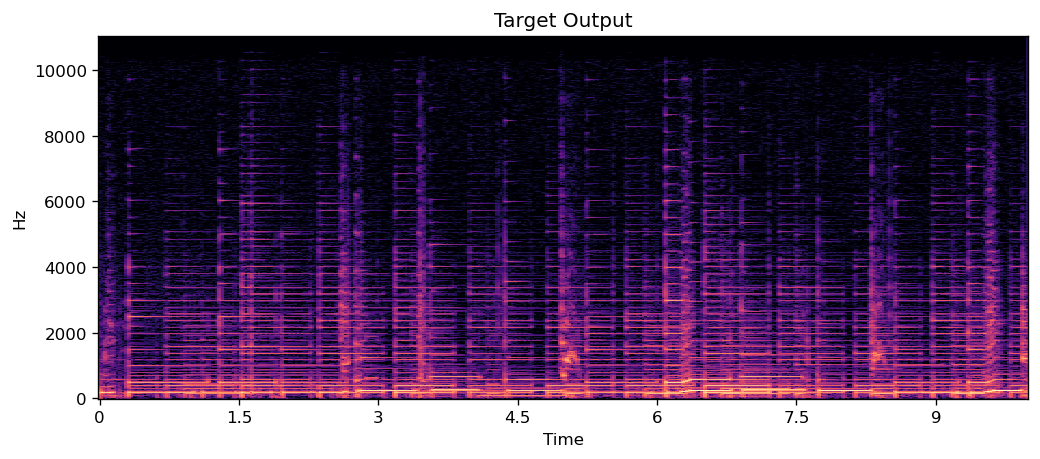

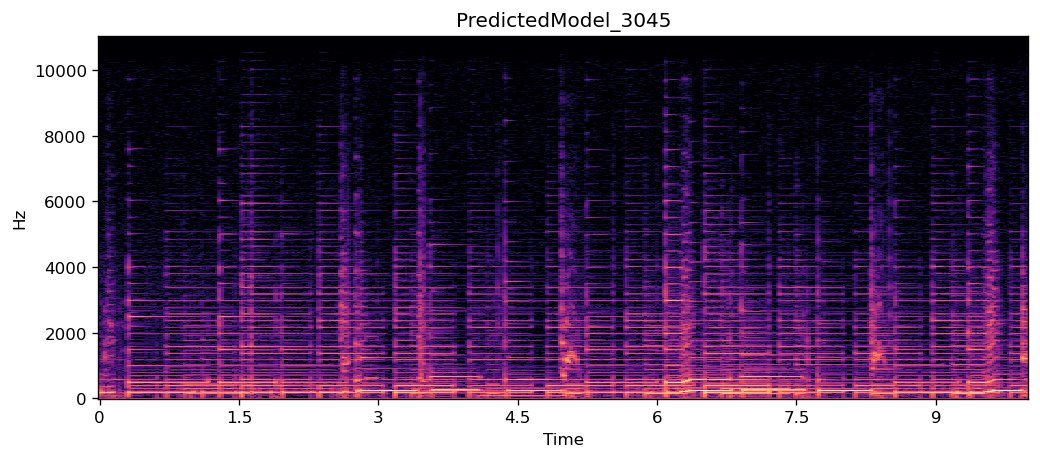

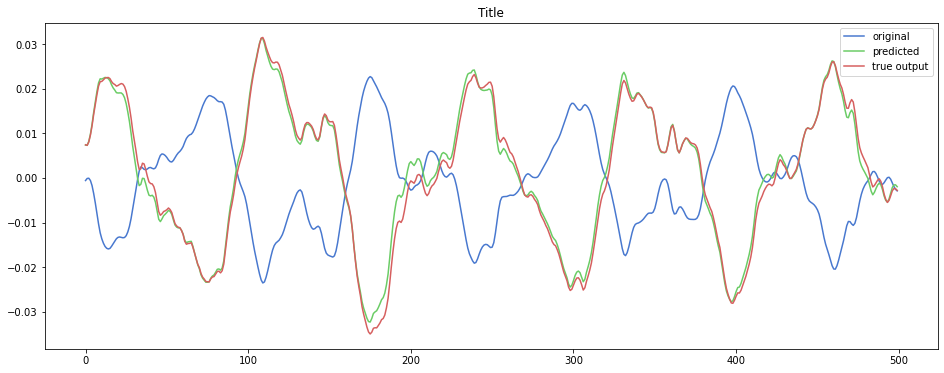

In [41]:
mySpectrogram(dry_audio, sr, 'Dry audio')
mySpectrogram(wet_audio, sr, 'Target Output')
mySpectrogram(predicted, sr, 'Predicted'+model_name)



compare_waveforms(dry_audio, predicted, wet_audio, 'Title', 20000,20500)



In [39]:
sf.write('predictedB65.wav', predicted, sr)
Ipd.Audio(predicted, rate=sr)


In [32]:
Ipd.Audio(dry_audio, rate=sr)


In [40]:
sf.write('true_B65.wav', predicted, sr)
Ipd.Audio(wet_audio, rate=sr)


In [42]:
dry_audio, dummy = librosa.load('./MLDataset2/Dry.wav', sr=sr, duration=11, offset=109)
# Choose this line for a model trained on the SD1
wet_audio, dummy = librosa.load('./MLDataset2/SD1.wav', sr=sr, duration=11, offset=109)
# Choose this line for a model trained on the B65
wet_audio_2, dummy = librosa.load('./MLDataset2/B65.wav', sr=sr, duration=11, offset=109)

sf.write('Dry_ex.wav', dry_audio, sr)
sf.write('SD1_ex.wav', wet_audio, sr)
sf.write('B65_ex.wav', wet_audio_2, sr)
